# Analysinig the Data in the File 
 Handling Missing as well as other values and categories 

In [46]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
diabetes_df = pd.read_csv("D:\Data Analysis With Python\Diabetes_Data_Set\data\diabetes.csv");

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Sian\AppData\Local\Temp\ipykernel_12760\3794751360.py:1: SyntaxWarning: invalid escape sequence '\D'
  diabetes_df = pd.read_csv("D:\Data Analysis With Python\Diabetes_Data_Set\data\diabetes.csv");


Making a Copy of the original dataset 

In [3]:
original_df=diabetes_df.copy()

In [4]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 0, 'Skin Thickness')

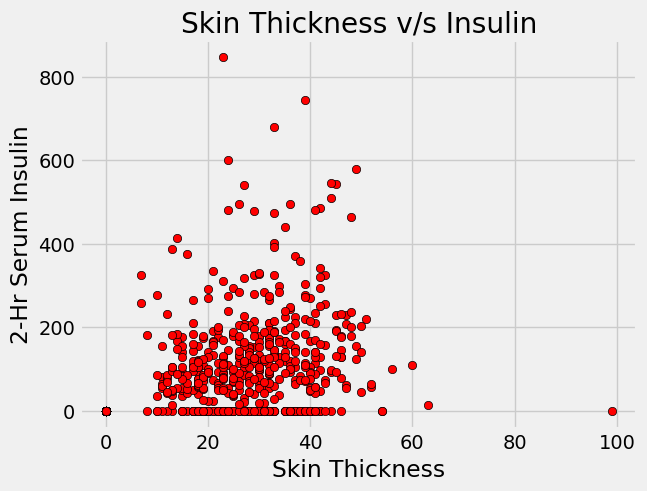

In [8]:
plt.style.use('fivethirtyeight')
plt.scatter(x='SkinThickness',y='Insulin',data=diabetes_df,edgecolors='black',c='r')
plt.title("Skin Thickness v/s Insulin")
plt.ylabel('2-Hr Serum Insulin')
plt.xlabel("Skin Thickness")

Text(0, 0.5, 'BMI')

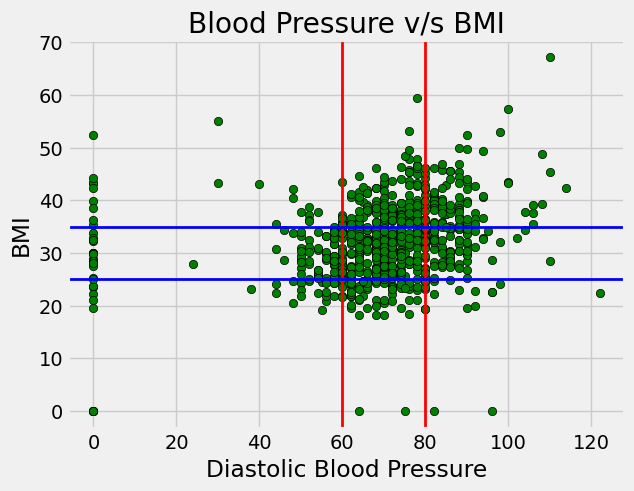

In [9]:
plt.style.use('fivethirtyeight')
plt.scatter(x='BloodPressure',y='BMI',data=diabetes_df,edgecolors='black',c='g')
plt.axvline(x=80,linewidth=2,color='red')
plt.axvline(x=60,linewidth=2,color='red')
plt.axhline(y=25,linewidth=2,color='blue')
plt.axhline(y=35,linewidth=2,color='blue')
plt.title("Blood Pressure v/s BMI")
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel("BMI")

The Body Mass index is almost Normally Distributed

In [47]:
fig = px.histogram(diabetes_df, 
                   x='BMI', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

25-30 --> Overwieght
30-35 --> Moderatley Obese 
35-40 --> Severely Obese

Text(0, 0.5, 'DiabetesPedigreeFunction')

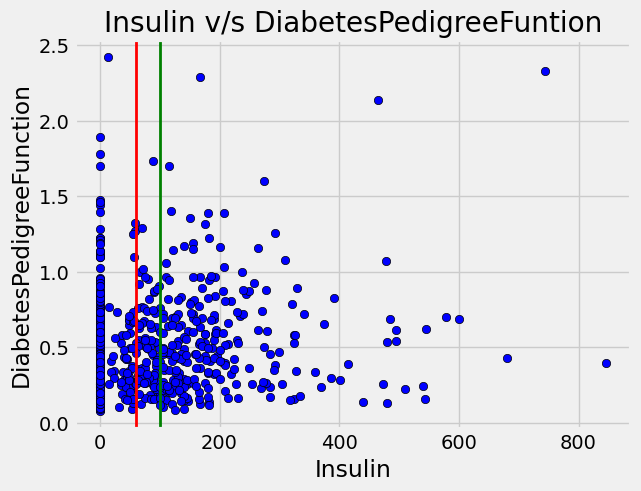

In [10]:
plt.style.use('fivethirtyeight')
plt.scatter(x='Insulin',y='DiabetesPedigreeFunction',data=diabetes_df,edgecolors='black',c='b')
plt.title("Insulin v/s DiabetesPedigreeFuntion")
plt.axvline(x=60,linewidth=2,color='red')
plt.axvline(x=100,linewidth=2,color='green')
plt.xlabel('Insulin')
plt.ylabel("DiabetesPedigreeFunction")

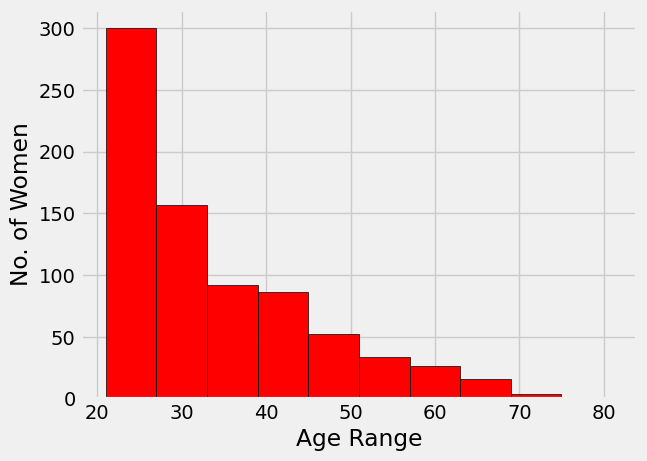

In [11]:
plt.xlabel("Age Range")
plt.ylabel("No. of Women")
plt.hist(x='Age',data=diabetes_df,color='red',edgecolor='black');

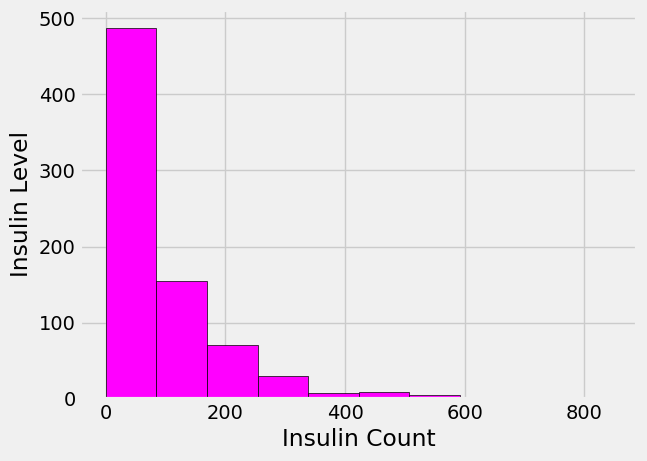

In [12]:
plt.xlabel("Insulin Count")
plt.ylabel("Insulin Level")
plt.hist(x='Insulin',data=diabetes_df,color='magenta',edgecolor='black');

Text(0.5, 0, 'Skin Thickness')

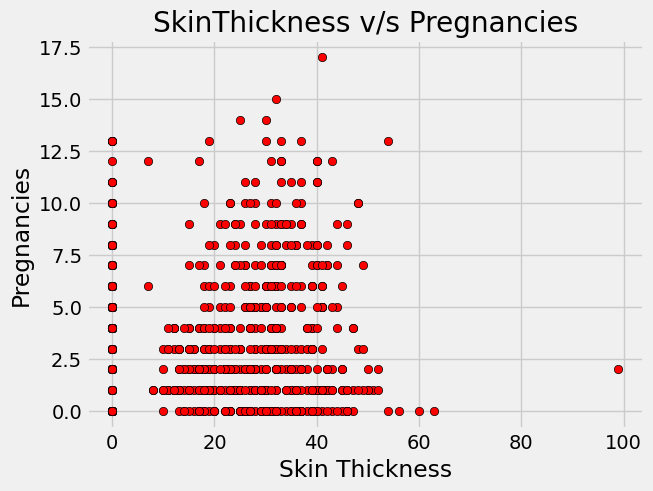

In [13]:
plt.style.use('fivethirtyeight')
plt.scatter(x='SkinThickness',y='Pregnancies',data=diabetes_df,edgecolors='black',c='r')
plt.title("SkinThickness v/s Pregnancies")
plt.ylabel('Pregnancies')
plt.xlabel("Skin Thickness")

## Correlation Analysis of the Input-Features 

<Axes: title={'center': 'Correlational Analysis of the Attributes'}>

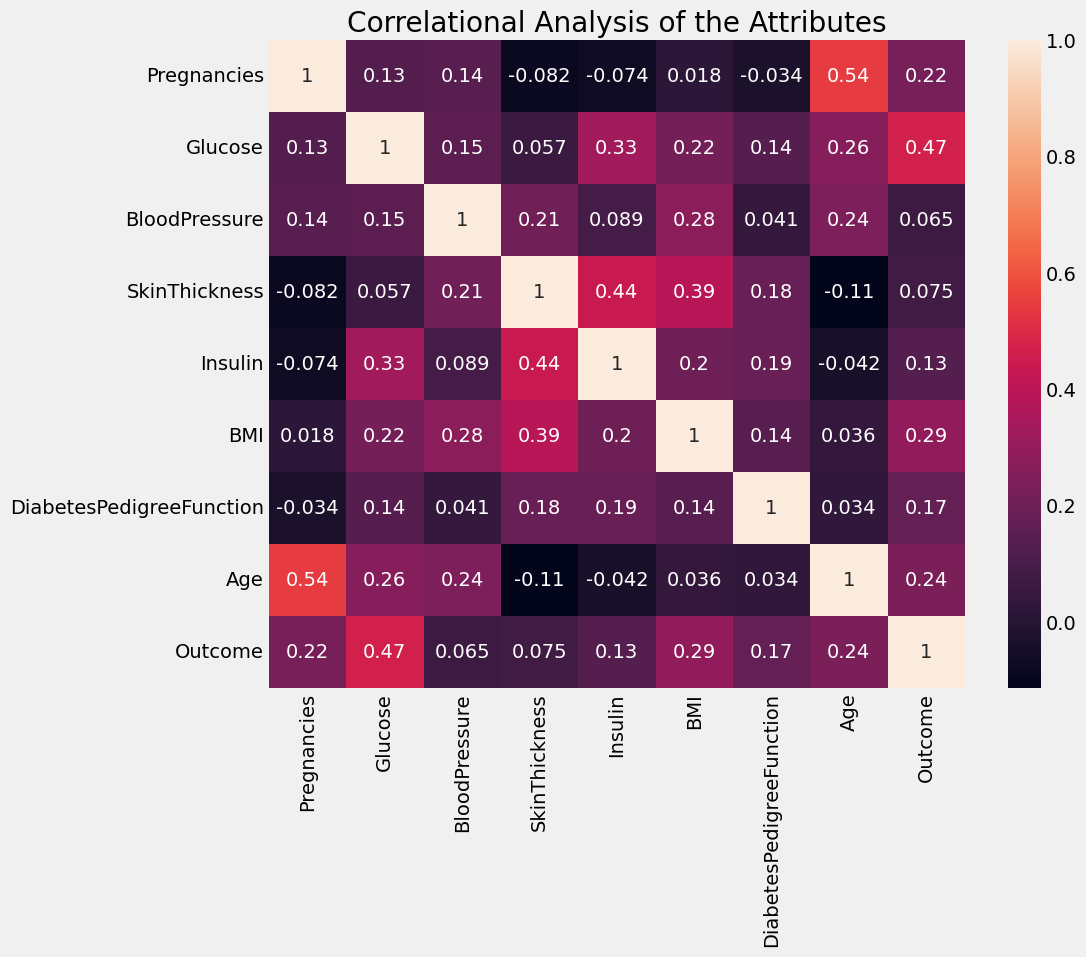

In [14]:
correlation_df=diabetes_df.corr()
plt.figure(figsize=(10,8))
plt.title("Correlational Analysis of the Attributes")
sns.heatmap(correlation_df,annot=True)


In [15]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Scaling the Dataframe as there is high variance between values of different parameters in the dataframe
When we fit using the standard scaler the original dataframe is changed using new values 

In [16]:
scaler=StandardScaler()

# Logistic Regression

In [17]:
# Train Test Split
X= diabetes_df[['Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age','SkinThickness','Pregnancies','BloodPressure']]
Y=diabetes_df['Outcome']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=42)

# Note that here we have to fit_transform the train data 
x_train_scaled=scaler.fit_transform(x_train)

# We have only transform the test data
x_test_scaled=scaler.transform(x_test)

In [19]:
Linear_model=LogisticRegression()

#### Hyper-Parameter Tunning for Logistic Regression using GridSearch-CV

In [20]:
p_grid_1={
    'C':[0.001,0.01,0.1,1,10,100],
    'penalty':['l2']
}

grid_search_1=GridSearchCV(estimator=Linear_model,param_grid=p_grid_1,cv=5,scoring='accuracy',verbose=1)
grid_search_1.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             scoring='accuracy', verbose=1)

In [21]:
tunned_model_1=grid_search_1.best_estimator_

y_gd_1=tunned_model_1.predict(x_test_scaled)

In [22]:
print(f"Classification Report : \n{classification_report(y_test,y_gd_1)}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [23]:
Linear_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [24]:
Linear_model.score(x_train_scaled, y_train)

0.7703583061889251

In [25]:
y_pred_1 = Linear_model.predict(x_test_scaled)

In [26]:
accuracy_score(y_test,y_pred_1)

0.7532467532467533

In [27]:
print(f"Classification Report : \n{classification_report(y_test,y_pred_1)}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# Random Forest Classifier

In [28]:
RFC_model=RandomForestClassifier()

#### Hyperparameter Tunning for RFC using GridSearch CV  

In [29]:
p_grid_2 = {
    'n_estimators': [50, 100, 200],              
    'max_depth': [None, 5, 10, 15, 20],         
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4, 6],          
    'max_features': ['sqrt','log2'],            
    'bootstrap': [True, False]                
}


grid_search_2=GridSearchCV(estimator=RFC_model,param_grid=p_grid_2,scoring='accuracy',cv=5,verbose=2,error_score='raise')
grid_search_2.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [30]:
tunned_model_2=grid_search_2.best_estimator_
y_gd_2=tunned_model_2.predict(x_test_scaled)

In [31]:
print(f"Classification Report : \n{classification_report(y_test,y_gd_2)}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        99
           1       0.62      0.60      0.61        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [32]:
RFC_model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [33]:
y_pred_2=RFC_model.predict(x_test_scaled)

In [34]:
print(f"Classification Report : \n{classification_report(y_test,y_pred_2)}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Support Vector Machines

In [35]:
svm_model_3=SVC()

#### Hyperparameter Tunning Using Gridsearch-CV

In [36]:
p_grid_3 = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'gamma': ['scale', 'auto'] 
}

grid_search_3=GridSearchCV(estimator=svm_model_3,param_grid=p_grid_3,scoring='accuracy',cv=5,verbose=2,error_score='raise')
grid_search_3.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal

GridSearchCV(cv=5, error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [37]:
tunned_model_3=grid_search_3.best_estimator_
y_gd_3=tunned_model_3.predict(x_test_scaled)

In [38]:
print(f"Classification Report : \n{classification_report(y_test,y_gd_3)}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [39]:
svm_model_3.fit(x_train_scaled,y_train)

SVC()

In [40]:
y_pred_3=svm_model_3.predict(x_test_scaled)

In [41]:
print(f"Classification Report : \n{classification_report(y_test,y_pred_3)}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [42]:
f1_score_list=[f1_score(y_test,y_gd_1),f1_score(y_test,y_gd_2),f1_score(y_test,y_gd_3)]
acc_list=[accuracy_score(y_test,y_gd_1),accuracy_score(y_test,y_gd_2),accuracy_score(y_test,y_gd_3)]
model_name=['Logistic Regression','RandomForestClassifier','SupportVectorMachiines']


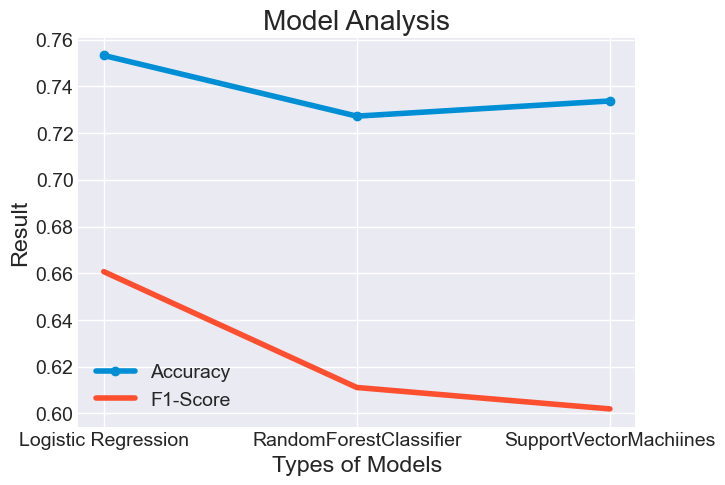

In [43]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.title("Model Analysis")
plt.grid(True)
plt.plot(model_name,acc_list,label='Accuracy',marker='o')
plt.plot(model_name,f1_score_list,label='F1-Score')
plt.xlabel("Types of Models")
plt.ylabel("Result")
plt.legend()